#YOLO OBJECT DETECTION

## Description:
1.The  below python notebook is implementation of  YOLO Object detection

2.Around 500 annotated images of Class = 'Mask' are used for the training.

3.This below implementation is a single class prediction which is 'Mask' in this case.

4.For inferencing a you tube vedio (with persons having masks) is converted into images using ffmpeg and fed to the trained yolo model.

5.After the yolo model detected 'Mask' in the input images(generated out of the ytube video) fed,The output images,with the mask predicted is again converted back to video using ffmpeg



## Step 1:Git Clone Yolo V3 to the Google Colab
(Don't forget to put 'yolov3-spp-ultralytics.pt' file in the weights folder of YoloV3)

In [0]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 4.83 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## Step2 :Install  ffmpeg for converting Video to image and image to video conversion

In [0]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


## Step 3 :Mount the Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Step 4: Change the directory to YoloV3

In [0]:
cd gdrive/'My Drive'/YoloV3

/content/gdrive/My Drive/YoloV3


In [0]:
!ls

 cfg	     __pycache__    test_batch0.png   'ubdivisions=1'
 data	     README.md	    test.py	       utils
 detect.py   results.json   ting	       vim.exe.stackdump
 models.py   results.png    train_batch0.png   weights
 output      results.txt    train.py


## Step 5:Import the necessary Pytorch and OS and Image utililites

In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


##Step 6:For testing if YoloV3 setup is fine,first train a small coco data set of 20 images.
Ths coco data set is available in the YoloV3 which is gitcloned in step 1

(Note:The 20 images are annotated and the annotated images labels are placed in the labels directory.)

In [0]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-24 04:10:59.802715: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:09<00:00,  2.12it/s]
Caching images (0.0GB): 100% 20/20 [00:07<00:00,  2.84it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 96

#Step 7: Now train YoloV3 for custom data.
The custom data in this case is 500 Masked images placed in the 'images' directory.The images are annotated and the corresponding labels are placed in the 'labels; directory

These 500 images are trained for 300 Epochs

In [0]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-25 22:09:03.890435: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (497 found, 0 missing, 3 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 1073.97it/s]
Caching images (0.3GB): 100% 500/500 [00:03<00:00, 136.80it/s]
Caching labels (497 found, 0 missing, 3 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00

## Step 8:The trained Yolo model is now used to detect the Mask in the images.

The input images fed to the trained model is nothing but these 500 images(with mask) only.

The ouput(Images with Masked output is stored in the out_out directory under 'YoloV3' directory)


In [0]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/500 data/customdata/images/1.jpg: 384x512 3 masks, Done. (0.036s)
image 2/500 data/customdata/images/10.jpg: 384x512 1 masks, Done. (0.033s)
image 3/500 data/customdata/images/100.jpg: 384x512 2 masks, Done. (0.033s)
image 4/500 data/customdata/images/101.jpg: 384x512 1 masks, Done. (0.033s)
image 5/500 data/customdata/images/102.jpg: 320x512 1 masks, Done. (0.025s)
image 6/500 data/customdata/images/103.jpg: 320x512 1 masks, Done. (0.021s)
image 7/500 data/customdata/images/104.jpg: 320x512 1 masks, Done. (0.021s

## Step 9:Display few of the predicted images stored in out_out

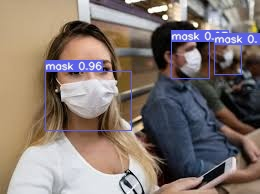

In [0]:
Image(filename='out_out/1.jpg', width=600)

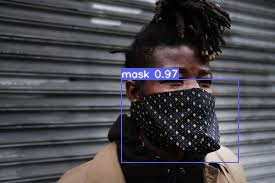

In [0]:
Image(filename='out_out/2.jpg', width=600)

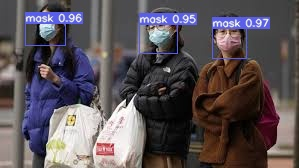

In [0]:
Image(filename='out_out/3.jpg', width=600)

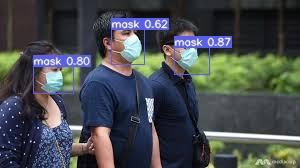

In [0]:
Image(filename='out_out/4.jpg', width=600)

## Step 10:Upload few videos of having persons in Mask

In [0]:
!ls '/content/gdrive/My Drive/YoloV3/data/customdata/Vedios/'

images	MaskSports.mp4	MasksPubllic.mp4  MasksPub.mp4	SportsGear.mp4


## Step 11:Convert the Videos into images using ffmpeg

In [0]:
!ffmpeg -i "/content/gdrive/My Drive/YoloV3/data/customdata/Vedios/MasksPubllic.mp4" data/customdata/Vedios/imagespub/image-%03d.jpg

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!ls '/content/gdrive/My Drive/YoloV3/data/customdata/Vedios/images'

image-001.jpg	image-1116.jpg	image-326.jpg  image-552.jpg  image-778.jpg
image-002.jpg	image-1117.jpg	image-327.jpg  image-553.jpg  image-779.jpg
image-003.jpg	image-1118.jpg	image-328.jpg  image-554.jpg  image-780.jpg
image-004.jpg	image-1119.jpg	image-329.jpg  image-555.jpg  image-781.jpg
image-005.jpg	image-111.jpg	image-330.jpg  image-556.jpg  image-782.jpg
image-006.jpg	image-1120.jpg	image-331.jpg  image-557.jpg  image-783.jpg
image-007.jpg	image-1121.jpg	image-332.jpg  image-558.jpg  image-784.jpg
image-008.jpg	image-1122.jpg	image-333.jpg  image-559.jpg  image-785.jpg
image-009.jpg	image-1123.jpg	image-334.jpg  image-560.jpg  image-786.jpg
image-010.jpg	image-1124.jpg	image-335.jpg  image-561.jpg  image-787.jpg
image-011.jpg	image-1125.jpg	image-336.jpg  image-562.jpg  image-788.jpg
image-012.jpg	image-1126.jpg	image-337.jpg  image-563.jpg  image-789.jpg
image-013.jpg	image-112.jpg	image-338.jpg  image-564.jpg  image-790.jpg
image-014.jpg	image-113.jpg	image-339.jpg  image-565.

## Step 12:Feed this converted images(out of Video) to trained Yolo.
(The predicted 'Mask' by Yolo would be stored in out_pub1)

In [0]:
!python detect.py --conf-thres 0.1 --output out_pub1 --source data/customdata/Vedios/imagespub

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_pub1', save_txt=False, source='data/customdata/Vedios/imagespub', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/2019 data/customdata/Vedios/imagespub/image-001.jpg: 320x512 1 masks, Done. (0.034s)
image 2/2019 data/customdata/Vedios/imagespub/image-002.jpg: 320x512 1 masks, Done. (0.033s)
image 3/2019 data/customdata/Vedios/imagespub/image-003.jpg: 320x512 1 masks, Done. (0.033s)
image 4/2019 data/customdata/Vedios/imagespub/image-004.jpg: 320x512 1 masks, Done. (0.029s)
image 5/2019 data/customdata/Vedios/imagespub/image-005.jpg: 320x512 1 masks, Done. (0.028s)
image 6/2019 data/customdata/Vedios/imagespub/image

## Step 13:The predicted output images are agained converted back to Video using ffmpeg
(The same ie the converted Video has to be uploaded to Ytube for submission)

In [0]:
!ffmpeg -i 'out_pub1/image-%03d.jpg' 'maskvideo.mp4'

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena